## In this project I tried to cleaning and visualizating data that I got from dataquest. The data is about popular data science question

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import datetime as dt

# Enable plotting inline. 
%matplotlib inline

In [2]:
# read the data and look for the data info
StackExchange = pd.read_csv("2019_questions.csv")
StackExchange.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             8839 non-null   int64  
 1   CreationDate   8839 non-null   object 
 2   Score          8839 non-null   int64  
 3   ViewCount      8839 non-null   int64  
 4   Tags           8839 non-null   object 
 5   AnswerCount    8839 non-null   int64  
 6   FavoriteCount  1407 non-null   float64
dtypes: float64(1), int64(4), object(2)
memory usage: 483.5+ KB


In [3]:
# Show a sample of the data
StackExchange.head()

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,44419,2019-01-23 09:21:13,1,21,<machine-learning><data-mining>,0,NaN
1,44420,2019-01-23 09:34:01,0,25,<machine-learning><regression><linear-regressi...,0,NaN
2,44423,2019-01-23 09:58:41,2,1651,<python><time-series><forecast><forecasting>,0,NaN
3,44427,2019-01-23 10:57:09,0,55,<machine-learning><scikit-learn><pca>,1,NaN
4,44428,2019-01-23 11:02:15,0,19,<dataset><bigdata><data><speech-to-text>,0,NaN


In [4]:
# Replacing the NaN to 0
StackExchange["FavoriteCount"].fillna(0,inplace = True)

In [5]:
StackExchange["FavoriteCount"] = StackExchange["FavoriteCount"].astype(int)
StackExchange["CreationDate"] = pd.to_datetime(StackExchange["CreationDate"])
StackExchange.info()
StackExchange["Tags"].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             8839 non-null   int64         
 1   CreationDate   8839 non-null   datetime64[ns]
 2   Score          8839 non-null   int64         
 3   ViewCount      8839 non-null   int64         
 4   Tags           8839 non-null   object        
 5   AnswerCount    8839 non-null   int64         
 6   FavoriteCount  8839 non-null   int32         
dtypes: datetime64[ns](1), int32(1), int64(4), object(1)
memory usage: 449.0+ KB


0                      <machine-learning><data-mining>
1    <machine-learning><regression><linear-regressi...
2         <python><time-series><forecast><forecasting>
3                <machine-learning><scikit-learn><pca>
4             <dataset><bigdata><data><speech-to-text>
Name: Tags, dtype: object

In [6]:
# Replacing the <> symbol
StackExchange["Tags"] = StackExchange["Tags"].str.replace("^<","").str.replace(">$","").str.split("><")
StackExchange["Tags"].head()

C:\Users\zikhr\AppData\Local\Temp/ipykernel_5948/1889788347.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  StackExchange["Tags"] = StackExchange["Tags"].str.replace("^<","").str.replace(">$","").str.split("><")


0                      [machine-learning, data-mining]
1    [machine-learning, regression, linear-regressi...
2         [python, time-series, forecast, forecasting]
3                [machine-learning, scikit-learn, pca]
4             [dataset, bigdata, data, speech-to-text]
Name: Tags, dtype: object

In [7]:
tag_count = dict()
for tags in StackExchange["Tags"]:
    for tag in tags:
        if tag in tag_count:
            tag_count[tag] += 1
        else:
            tag_count[tag] = 1
#converts dictionary into a DataFrame         
tag_count_df = pd.DataFrame.from_dict(tag_count, orient = "index")
tag_count_df.rename(columns = {0:"counts"}, inplace = True)
tag_count_df.head()

#sort values in ascending mode
most_used_tags = tag_count_df.sort_values("counts", ascending = False ).head(20)
most_used_tags.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, machine-learning to machine-learning-model
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   counts  20 non-null     int64
dtypes: int64(1)
memory usage: 320.0+ bytes


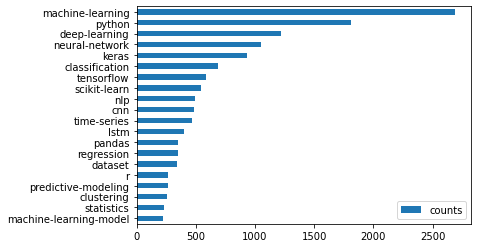

In [8]:
ax = most_used_tags.plot.barh()
ax.invert_yaxis()
plt.show()

In [9]:
tag_views = dict()
for index, row in StackExchange.iterrows():
    for tag in row["Tags"]:
        if tag in tag_views:
            tag_views[tag] += row["ViewCount"]
        else:
            tag_views[tag] = row["ViewCount"]

#converts dictionary into a DataFrame         
tag_views_df = pd.DataFrame.from_dict(tag_views, orient = "index")
tag_views_df.rename(columns = {0:"views"}, inplace = True)
tag_views_df.head()

#sort values in ascending mode
most_viewed_tags = tag_views_df.sort_values("views", ascending = False ).head(20)
most_viewed_tags.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, python to clustering
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   views   20 non-null     int64
dtypes: int64(1)
memory usage: 320.0+ bytes


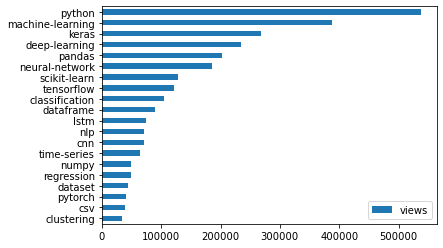

In [10]:
ax2 = most_viewed_tags.plot.barh()
ax2.invert_yaxis()
plt.show()

In [11]:
in_used = pd.merge(most_used_tags, most_viewed_tags, how = "left", left_index=True, right_index = True)
in_viewed = pd.merge(most_used_tags, most_viewed_tags, how = "right", left_index=True, right_index = True)

In [12]:
Questions = pd.read_csv("all_questions.csv")
Questions.info()
Questions.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21576 entries, 0 to 21575
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            21576 non-null  int64 
 1   CreationDate  21576 non-null  object
 2   Tags          21576 non-null  object
dtypes: int64(1), object(2)
memory usage: 505.8+ KB


,Id,CreationDate,Tags
0,45416,2019-02-12 00:36:29,<python><keras><tensorflow><cnn><probability>
1,45418,2019-02-12 00:50:39,<neural-network>
2,45422,2019-02-12 04:40:51,<python><ibm-watson><chatbot>
3,45426,2019-02-12 04:51:49,<keras>
4,45427,2019-02-12 05:08:24,<r><predictive-modeling><machine-learning-mode...


In [13]:
Questions["Tags"] = Questions["Tags"].str.replace("^<|>$","").str.split("><")
Questions.head(10)

C:\Users\zikhr\AppData\Local\Temp/ipykernel_5948/3848316043.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  Questions["Tags"] = Questions["Tags"].str.replace("^<|>$","").str.split("><")


,Id,CreationDate,Tags
0,45416,2019-02-12 00:36:29,"[python, keras, tensorflow, cnn, probability]"
1,45418,2019-02-12 00:50:39,[neural-network]
2,45422,2019-02-12 04:40:51,"[python, ibm-watson, chatbot]"
3,45426,2019-02-12 04:51:49,[keras]
4,45427,2019-02-12 05:08:24,"[r, predictive-modeling, machine-learning-mode..."
5,45428,2019-02-12 05:43:18,[cnn]
6,45430,2019-02-12 06:20:30,"[machine-learning, learning]"
7,45431,2019-02-12 07:26:56,[machine-learning]
8,45433,2019-02-12 08:56:23,"[python, keras, tensorflow, lstm]"
9,45434,2019-02-12 09:09:01,"[neural-network, feature-selection, mlp]"


In [14]:
Questions["CreationDate"] = pd.to_datetime(Questions["CreationDate"])
Questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21576 entries, 0 to 21575
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Id            21576 non-null  int64         
 1   CreationDate  21576 non-null  datetime64[ns]
 2   Tags          21576 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 505.8+ KB


In [15]:
Questions["DL-flag"]=0
Questions.info()
Questions.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21576 entries, 0 to 21575
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Id            21576 non-null  int64         
 1   CreationDate  21576 non-null  datetime64[ns]
 2   Tags          21576 non-null  object        
 3   DL-flag       21576 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 674.4+ KB


,Id,CreationDate,Tags,DL-flag
0,45416,2019-02-12 00:36:29,"[python, keras, tensorflow, cnn, probability]",0
1,45418,2019-02-12 00:50:39,[neural-network],0
2,45422,2019-02-12 04:40:51,"[python, ibm-watson, chatbot]",0
3,45426,2019-02-12 04:51:49,[keras],0
4,45427,2019-02-12 05:08:24,"[r, predictive-modeling, machine-learning-mode...",0
5,45428,2019-02-12 05:43:18,[cnn],0
6,45430,2019-02-12 06:20:30,"[machine-learning, learning]",0
7,45431,2019-02-12 07:26:56,[machine-learning],0
8,45433,2019-02-12 08:56:23,"[python, keras, tensorflow, lstm]",0
9,45434,2019-02-12 09:09:01,"[neural-network, feature-selection, mlp]",0


In [16]:
Questions["DL-flag"] = Questions["Tags"].apply(lambda l: "deep-learning" in l)

In [17]:
DLQuestions = Questions[Questions["DL-flag"]==True]
DLQuestions.info()
DLQuestions.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2805 entries, 14 to 21575
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Id            2805 non-null   int64         
 1   CreationDate  2805 non-null   datetime64[ns]
 2   Tags          2805 non-null   object        
 3   DL-flag       2805 non-null   bool          
dtypes: bool(1), datetime64[ns](1), int64(1), object(1)
memory usage: 90.4+ KB


,Id,CreationDate,Tags,DL-flag
14,45442,2019-02-12 11:35:56,"[python, neural-network, deep-learning, keras]",True
28,45467,2019-02-12 21:49:08,"[machine-learning, deep-learning]",True
29,45469,2019-02-12 22:40:12,"[machine-learning, deep-learning, keras, sciki...",True
55,45515,2019-02-13 15:18:07,"[machine-learning, neural-network, deep-learni...",True
63,45530,2019-02-13 18:33:05,[deep-learning],True


In [18]:
YearQ = dict()
for date in DLQuestions["CreationDate"]:
    CurrentYear = date.year
    CurrentMonth = date.month
    if CurrentMonth < 4:
        CurrentQ = 1
    elif CurrentMonth < 7:
        CurrentQ = 2
    elif CurrentMonth < 10:
        CurrentQ = 3
    else: 
        CurrentQ = 4
    CurrentDate = CurrentYear*100 + CurrentQ
    if CurrentDate in YearQ:
        YearQ[CurrentDate] +=1
    else:
        YearQ[CurrentDate] = 1

In [19]:
YearQ_df = pd.DataFrame.from_dict(YearQ, orient = "index")
YearQ_df.rename(columns = {0:"questions"}, inplace = True)
YearQ_df = YearQ_df.sort_index()
YearQ_df.head(10)

,questions
201402,1
201403,1
201404,6
201501,3
201502,7
201503,8
201504,12
201601,27
201602,36
201603,47


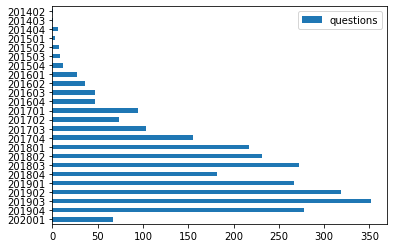

In [20]:
ax3 = YearQ_df.plot.barh()
ax3.invert_yaxis()
plt.show()

In [21]:
Year = dict()
for date in DLQuestions["CreationDate"]:
    CurrentYear = date.year
    if CurrentYear in Year:
        Year[CurrentYear] +=1
    else:
        Year[CurrentYear] = 1
#converts dictionary into a DataFrame
Year_df = pd.DataFrame.from_dict(Year, orient = "index")
Year_df.rename(columns = {0:"questions_DL"}, inplace = True)
Year_df = Year_df.sort_index()
Year_df.head(10)

,questions_DL
2014,8
2015,30
2016,157
2017,425
2018,902
2019,1216
2020,67


In [22]:
YearOther = dict()
for index, row in Questions.iterrows():
    if row["DL-flag"]==False:
        CurrentYear = row["CreationDate"].year
        if CurrentYear in YearOther:
            YearOther[CurrentYear] += 1
        else:
            YearOther[CurrentYear] = 1
#converts dictionary into a DataFrame
YearOther_df = pd.DataFrame.from_dict(YearOther, orient = "index")
YearOther_df.rename(columns = {0:"questions_Other"}, inplace = True)
YearOther_df = YearOther_df.sort_index()
YearOther_df.info()
YearOther_df.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 2014 to 2020
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   questions_Other  7 non-null      int64
dtypes: int64(1)
memory usage: 112.0 bytes


,questions_Other
2014,554
2015,1137
2016,1989
2017,2532
2018,4573
2019,7594
2020,392


From the data we clean, we know that the most used tag is machine-learning and viewed tag is python. And in the 2019 is the most qestion searched about data science.